# 基础知识

当数字不居中时，DNN识别效果不佳。

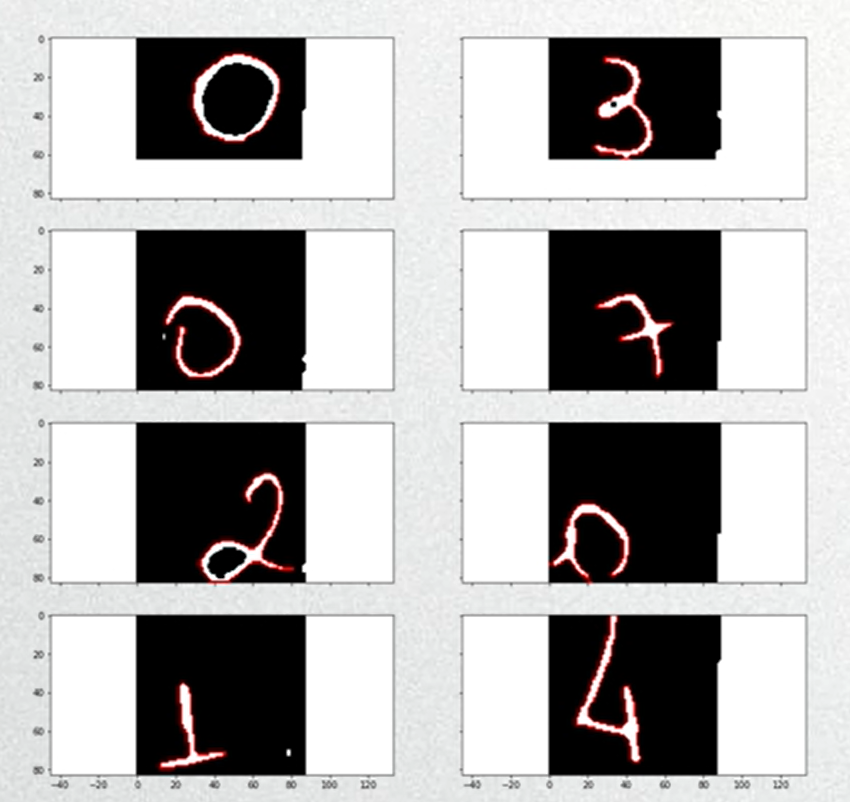

用识别特征的方式来实现。

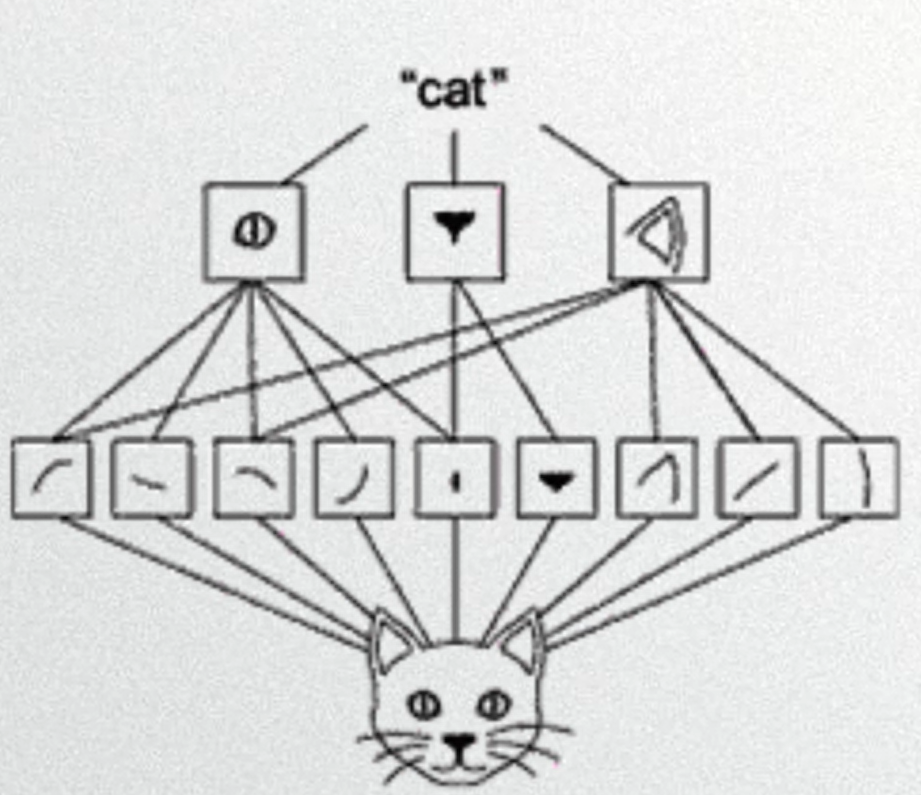

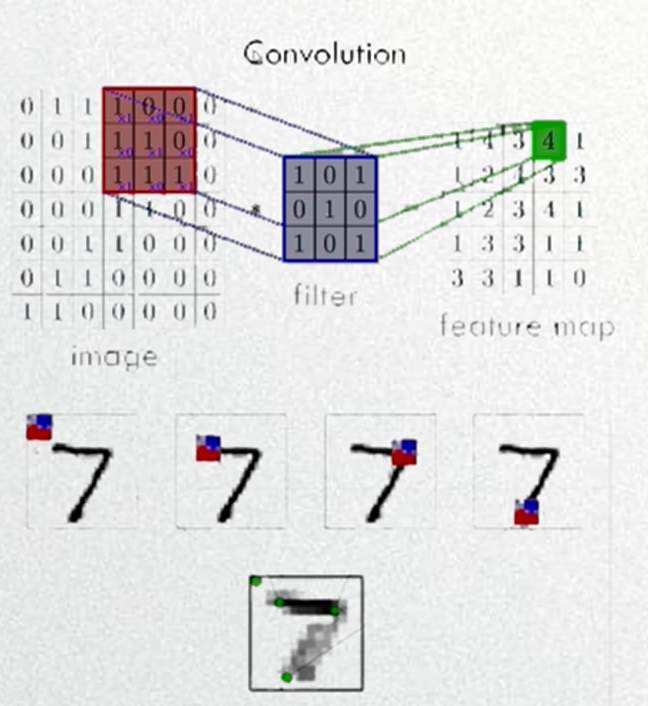

Convolutional Neural Network（CNN）卷积神经网络

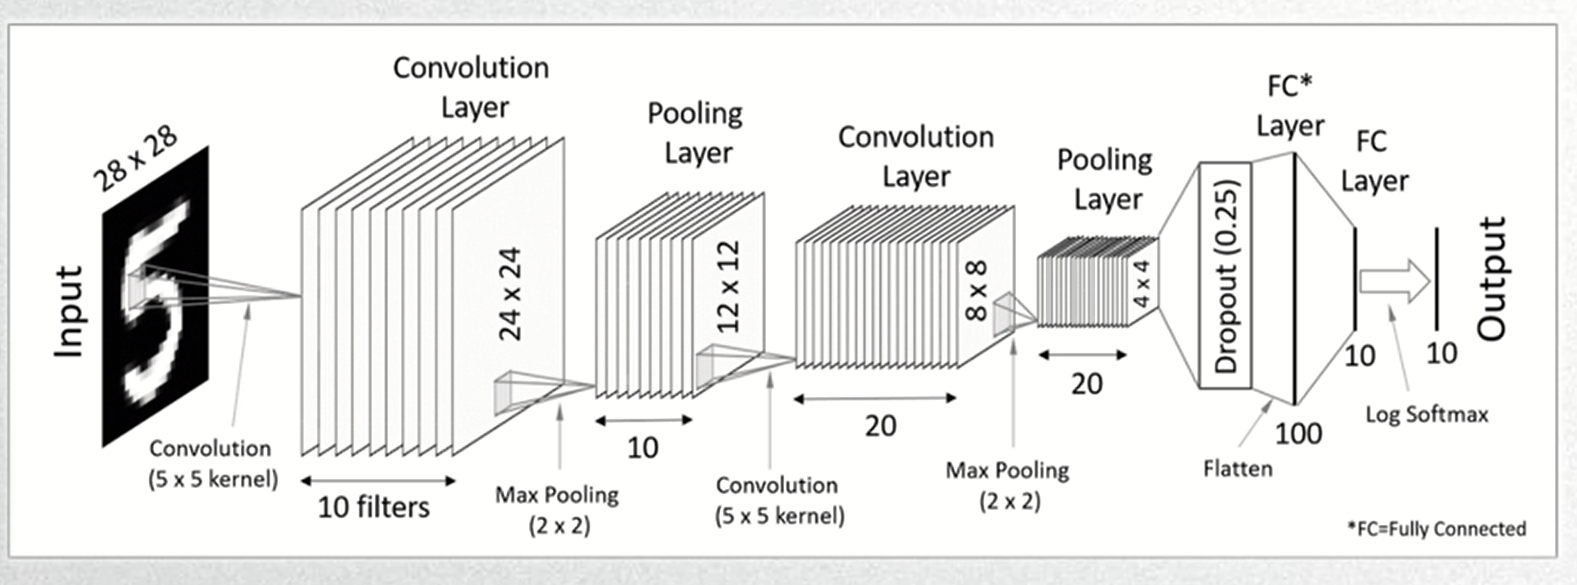

Max Pooling减小数据量

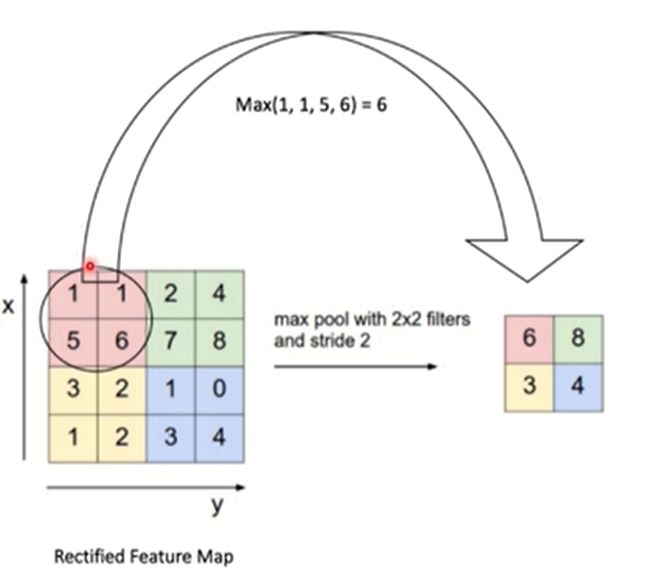

# 构造CNN神经元网络

In [1]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout


In [2]:
model=Sequential()
model.add(Conv2D(10,(5,5),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax")) #多个类别用softmax，两个类别用sigmod

model.compile(optimizer="rmsprop",loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])


# 加载训练数据

In [3]:
mnist = tf.keras.datasets.mnist     #keras是TensorFlow的高级API，相当于已经封装好的功能可以直接用
#(x_train,y_train),(x_test,y_test) =  mnist.load_data()    #在vscode中，在函数上按住ctrl，点击函数可以查看函数详情。 返回获得多个返回值（元祖）  原始数据别人已经帮我们整理好了。
(x_train,y_train),(x_test,y_test) =  mnist.load_data("mnist.npz")  

#normalized图片处理
normalized_x_train = tf.keras.utils.normalize(x_train,axis=1)
normalized_x_test = tf.keras.utils.normalize(x_test,axis=1)

#one_hot标签处理
one_hot_y_train=tf.one_hot(y_train,10)
one_hot_y_test=tf.one_hot(y_test,10)

reshaped_x_train=normalized_x_train.reshape(-1,28,28,1)  #-1表示第一个维度不用管
reshaped_x_test=normalized_x_test.reshape(-1,28,28,1)

# 训练CNN模型

In [4]:
train_result = model.fit(reshaped_x_train, one_hot_y_train, epochs=2, validation_data=(reshaped_x_test, one_hot_y_test))

Epoch 1/2
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2423 - accuracy: 0.9254 - val_loss: 0.0727 - val_accuracy: 0.9762
Epoch 2/2
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0883 - accuracy: 0.9720 - val_loss: 0.0433 - val_accuracy: 0.9856


# 使用matplotlib显示训练结果

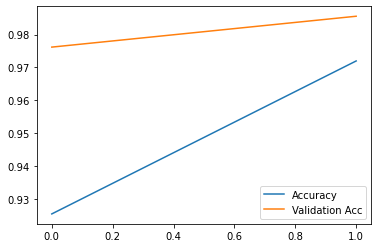

In [5]:
import matplotlib.pyplot as plt
plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.legend(["Accuracy","Validation Acc"])
plt.show()

#accuracy:训练集准确率
#val_accruacy:测试集准确率

# 测试CNN模型

In [8]:
import cv2
img = cv2.imread("2.jpg")
img_width=img.shape[1]
img_height=img.shape[0]
col_start=int((img_width-img_height)/2)
col_end=int(col_start+img_height)
cropped_img=img[:,col_start:col_end,:]
gray_img=cv2.cvtColor(cropped_img,cv2.COLOR_BGR2GRAY)   #转灰度
(thresh,black_white)=cv2.threshold(gray_img,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)   #转黑白
black_white=cv2.bitwise_not(black_white)   #反转
black_white=cv2.resize(black_white,(28,28))   #调整大小


cv2.imshow("a 3",black_white)
cv2.waitKey(0)  #等待界面上的输入
cv2.destroyAllWindows()  #释放资源



black_white=black_white/255   #进行归一化处理
black_white=black_white.reshape(-1,28,28,1)
prediction=model.predict(black_white)
prediction  #-1的作用就是在prediction外面再套一个[]

array([[4.7225639e-16, 1.6248347e-08, 9.9999940e-01, 1.3530814e-08,
        2.3413614e-18, 2.8159921e-25, 5.5060282e-24, 3.9845761e-14,
        6.2255185e-07, 1.9623946e-18]], dtype=float32)

In [9]:
import numpy as np
print(np.argmax(prediction))

2


试试看将照片横过来或者倒过来，查看是否可以识别成功。